In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [ ]:
import json

with open('/content/intents.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])

In [ ]:
pd.options.display.max_colwidth=None
df.head()

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, Hey there, Howdy, Hola, Bonjour, Konnichiwa, Guten tag, Ola]","[Hello there. Tell me how are you feeling today?, Hi there. What brings you here today?, Hi there. How are you feeling today?, Great to see you. How do you feel currently?, Hello there. Glad to see you're back. What's going on in your world right now?]"
1,morning,[Good morning],[Good morning. I hope you had a good night's sleep. How are you feeling today? ]
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night. Sweet dreams.]"


In [ ]:
dic = {"tag":[], "patterns":[], "responses":[]}
for example in data['intents']:
    for pattern in example['patterns']:
        dic['patterns'].append(pattern)
        dic['tag'].append(example['tag'])
        dic['responses'].append(example['responses'])

In [ ]:
pd.options.display.max_rows=15

pd.DataFrame([[dic['tag'], dic['patterns']]])

,0,1
0,"[greeting, greeting, greeting, greeting, greeting, greeting, greeting, greeting, greeting, greeting, greeting, greeting, morning, afternoon, evening, night, goodbye, goodbye, goodbye, goodbye, goodbye, goodbye, goodbye, goodbye, thanks, thanks, thanks, thanks, thanks, no-response, neutral-response, about, about, about, about, about, about, about, about, skill, creation, creation, creation, name, name, name, help, help, help, help, help, help, help, sad, sad, sad, sad, sad, sad, sad, sad, stressed, stressed, stressed, stressed, stressed, worthless, worthless, worthless, worthless, worthless, depressed, depressed, depressed, depressed, happy, happy, happy, happy, happy, happy, happy, casual, casual, casual, casual, casual, casual, casual, casual, casual, casual, casual, anxious, anxious, not-talking, not-talking, not-talking, not-talking, sleep, ...]","[Hi, Hey, Is anyone there?, Hi there, Hello, Hey there, Howdy, Hola, Bonjour, Konnichiwa, Guten tag, Ola, Good morning, Good afternoon, Good evening, Good night, Bye, See you later, Goodbye, Au revoir, Sayonara, ok bye, Bye then, Fare thee well, Thanks, Thank you, That's helpful, Thanks for the help, Than you very much, , nothing much, Who are you?, What are you?, Who you are?, Tell me more about yourself., What is your name?, What should I call you?, What's your name?, Tell me about yourself, What can you do?, Who created you?, How were you made?, How were you created?, My name is , I am name., I go by , Could you help me?, give me a hand please, Can you help?, What can you do for me?, I need support, I need help, Support me please, I am feeling lonely, I am so lonely, I feel down, I feel sad, I am sad, I feel so lonely, I feel empty, I don't have anyone, I am so stressed out, I am so stressed, I feel stuck, I still feel stressed, I am so burned out, I feel so worthless., No one likes me., I can't do anything., I am so useless, Nothing makes sense anymore, I can't take it anymore, I am so depressed, I think i'm depressed., I have depression, I feel great today., I am happy., I feel happy., I'm good., cheerful, I'm fine, I feel ok, Oh I see., ok, okay, nice, Whatever, K, Fine, yeah, yes, no, not really, I feel so anxious., I'm so anxious because of , I don't want to talk about it., No just stay away., I can't bring myself to open up., Just shut up, I have insominia, ...]"


In [ ]:
pd.options.display.max_colwidth=15
df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,[Hello ther...
1,greeting,Hey,[Hello ther...
2,greeting,Is anyone t...,[Hello ther...
3,greeting,Hi there,[Hello ther...
4,greeting,Hello,[Hello ther...
...,...,...,...
227,fact-29,How do I kn...,[If your be...
228,fact-30,How can I m...,[A lot of p...
229,fact-31,What's the ...,[Stress and...
230,fact-32,What's the ...,[Sadness is...


No charts were generated by quickchart


In [ ]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no-response', 'neutral-response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate-you',
       'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something-else', 'friends', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'pandora-useful', 'user-advice',
       'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2',
       'fact-3', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9',
       'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15',
       'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20', 'fact-21',
       'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27',
       'fact-28', 'fact-29', '

In [ ]:
df['tag'].nunique()

80

## Data Preprocessing¶


##### Now I am going to apply some text preprocessing stuffs such as lowering, punctuation removing and then tokenize the patterns.


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
#  lists to be a token
tokenizer.fit_on_texts(df['patterns'])
# serialized JSON dictionary
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 232,
 'word_counts': '{"hi": 2, "hey": 2, "is": 13, "anyone": 2, "there": 5, "hello": 1, "howdy": 1, "hola": 1, "bonjour": 1, "konnichiwa": 1, "guten": 1, "tag": 1, "ola": 1, "good": 5, "morning": 1, "afternoon": 1, "evening": 1, "night": 1, "bye": 3, "see": 2, "you": 38, "later": 1, "goodbye": 1, "au": 1, "revoir": 1, "sayonara": 1, "ok": 4, "then": 1, "fare": 1, "thee": 1, "well": 2, "thanks": 2, "thank": 3, "that\'s": 3, "helpful": 1, "for": 10, "the": 10, "help": 6, "than": 1, "very": 3, "much": 4, "nothing": 3, "who": 6, "are": 15, "what": 29, "tell": 6, "me": 19, "more": 6, "about": 20, "yourself": 3, "your": 3, "name": 4, "should": 3, "i": 95, "call": 1, "what\'s": 3, "can": 16, "do": 14, "created": 2, "how": 8, "were": 2, "made": 1, "my": 13, "am": 17, "go": 4, "by": 1, "could": 2, "give": 1, "a": 12, "hand": 1, "ple

In [ ]:
vacab_size = len(tokenizer.word_index)
print('number of unique words = ', vacab_size)
vacab_size = 1000

number of unique words =  303


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])
X = pad_sequences(ptrn2seq, padding='post')
print('X shape = ', X.shape)

lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['tag'])
print('y shape = ', y.shape)
print('num of classes = ', len(np.unique(y)))

X shape =  (232, 18)
y shape =  (232,)
num of classes =  80


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout

model = Sequential()
# Pass the length of the input sequence as a tuple
model.add(Input(shape=(X.shape[1],)))
model.add(Embedding(input_dim=vacab_size+1, output_dim=100))
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax"))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 18, 100)             │         100,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 18, 32)              │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 18, 32)              │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 18, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 18, 32)              │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ (None, 32)                  │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │          10,320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 148,756 (581.08 KB)

 Trainable params: 148,756 (581.08 KB)

 Non-trainable params: 0 (0.00 B)

# Split the data  

In [ ]:
model_history = model.fit(x=X,
                          y=y,
                          batch_size=10,
                          callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)],
                          epochs=100)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.0219 - loss: 5.1016
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0193 - loss: 4.3843
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0470 - loss: 4.2011
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.0693 - loss: 3.9558
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.1120 - loss: 3.6672
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0999 - loss: 3.4181
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1953 - loss: 3.1573
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2811 - loss: 2.8755
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3429 - loss: 2.5326
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3532 - loss: 2.3376
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3967 - loss: 2.1584
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

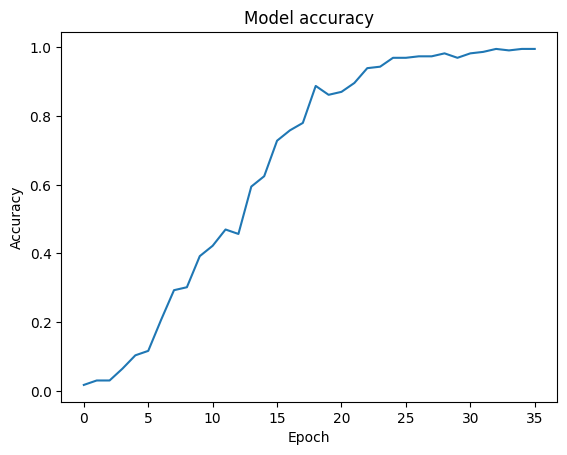

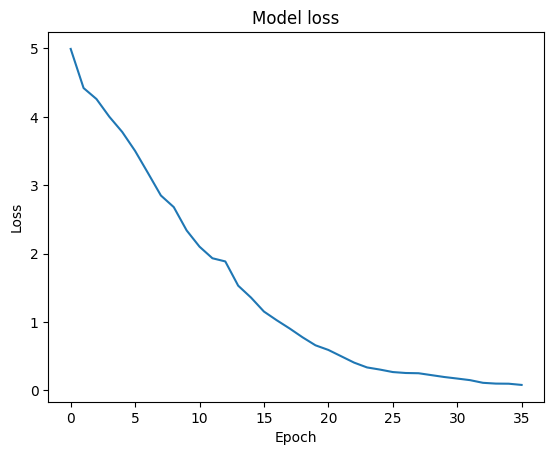

In [ ]:

import matplotlib.pyplot as plt

# Plot the accuracy
plt.plot(model_history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot the loss
plt.plot(model_history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# prompt: calculate precision recall for whole data

from sklearn.metrics import precision_score, recall_score

# Assuming 'y' contains the true labels and 'y_pred' contains the predicted labels
y_pred = np.argmax(model.predict(X), axis=1)  # Get predicted class labels

precision = precision_score(y, y_pred, average='weighted') #'weighted' accounts for label imbalance
recall = recall_score(y, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Precision: 0.9960488505747126
Recall: 0.9956896551724138


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


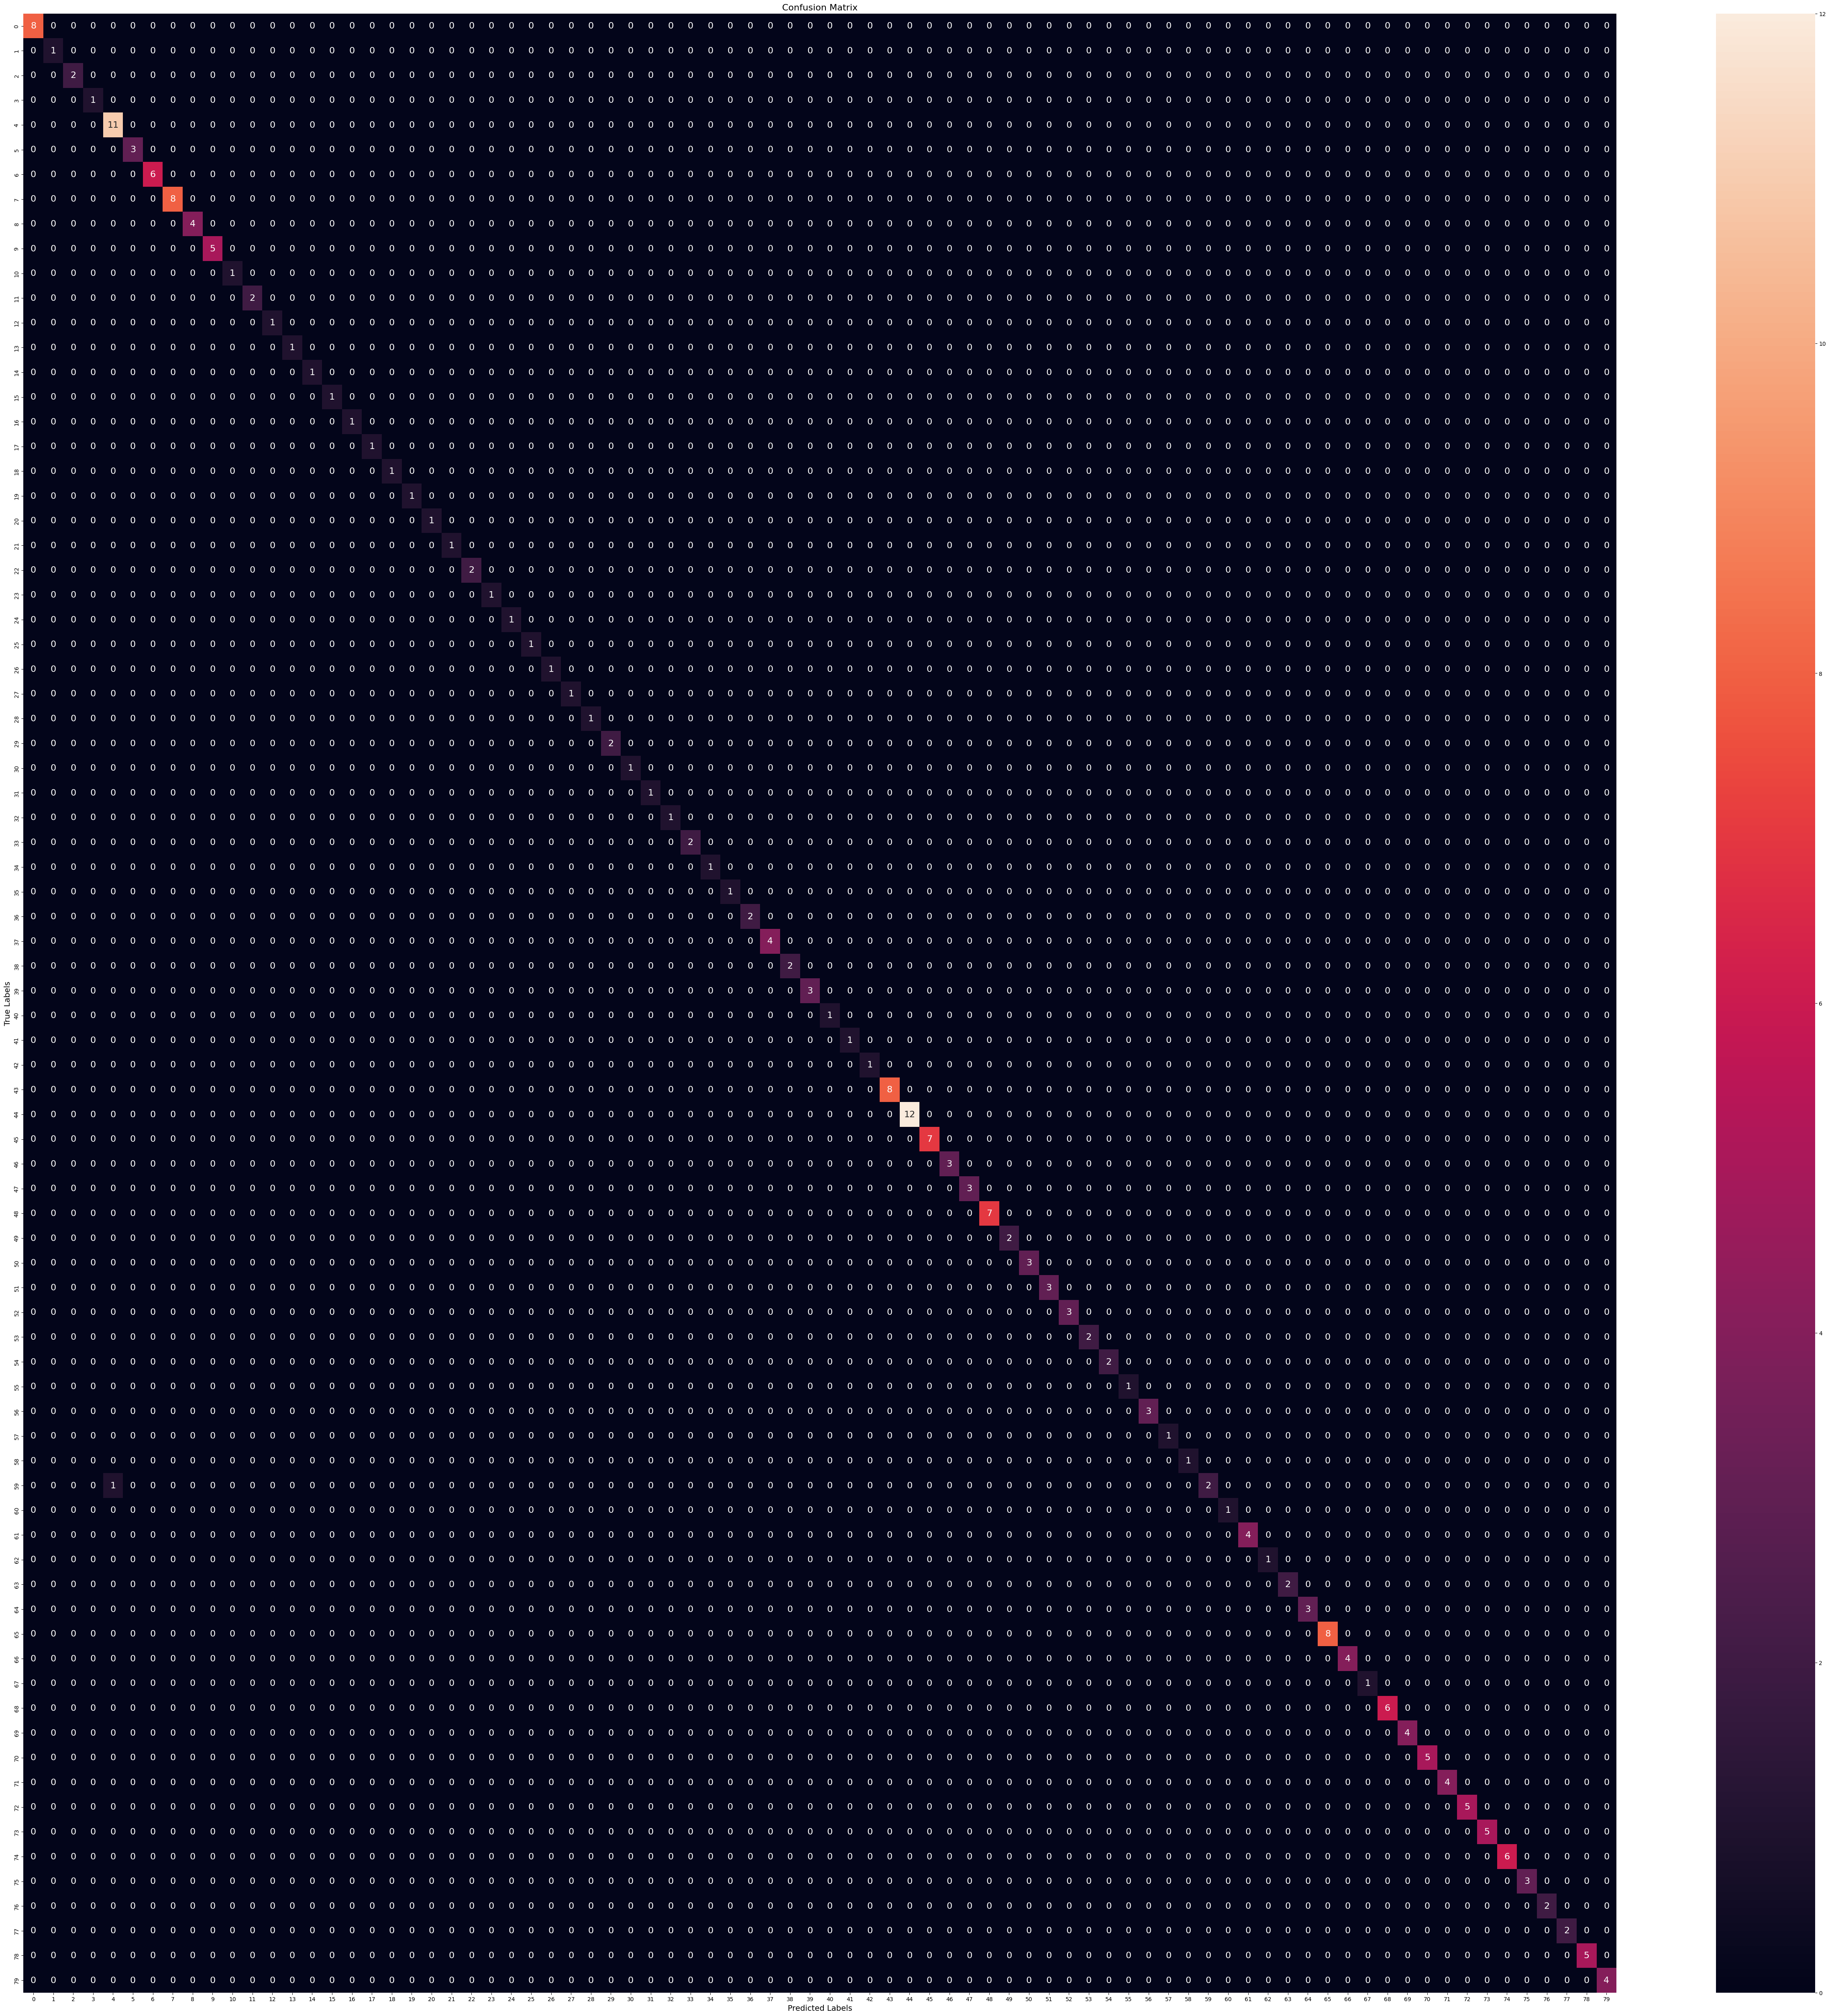

In [ ]:
# confusion matrix

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'y' contains the true labels and 'y_pred' contains the predicted labels
y_pred = np.argmax(model.predict(X), axis=1)  # Get predicted class labels

# Create the confusion matrix
cm = confusion_matrix(y, y_pred)

# Set the figure size automatically based on the matrix size
plt.figure(figsize=(cm.shape[0] * 0.8, cm.shape[1] * 0.8))  # Adjust the scaling factor as needed

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 16}) # Increased font size for annotations

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [ ]:
# 20 percent of the training data and evaluate the accuracy score on that data

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate the model on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on 20% of the training data: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy on 20% of the training data: 0.9787234042553191


In [ ]:
#  doing some evaluation on test data
test_patterns = ["What is your name?", "How are you doing today?", "Goodbye"]

# Preprocess the test data
test_sequences = tokenizer.texts_to_sequences(test_patterns)
X_test = pad_sequences(test_sequences, padding='post', maxlen=X.shape[1])  # Ensure same length as training data

# Make predictions
predictions = model.predict(X_test)

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Decode predicted classes back to tags
predicted_tags = lbl_enc.inverse_transform(predicted_classes)

# Print predictions
for i in range(len(test_patterns)):
    print(f"Pattern: {test_patterns[i]}")
    print(f"Predicted Tag: {predicted_tags[i]}")
    print(f"Confidence: {np.max(predictions[i])}")  # Print the confidence score
    print("---")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
Pattern: What is your name?
Predicted Tag: about
Confidence: 0.9818863868713379
---
Pattern: How are you doing today?
Predicted Tag: fact-5
Confidence: 0.452614963054657
---
Pattern: Goodbye
Predicted Tag: goodbye
Confidence: 0.9832662343978882
---


#  Model Testing


#### First we should apply some text preprocessing on the pattern that is passed to the function. Next we convert the text to vector of numbers and give it to model for prediction its tag; Finally based on the tag, we choose a answer(response) randomly and return it.



In [ ]:
import re
import random
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def generate_answer():
    while True:
        pattern = input("You: ")

        # Check if user wants to quit the session
        if pattern.lower() in ['quite', 'exit']:
            print("Ending the session. Goodbye!")
            break

        # Preprocess the input pattern
        text = []
        txt = re.sub('[^a-zA-Z\']', ' ', pattern)
        txt = txt.lower()
        txt = txt.split()
        txt = " ".join(txt)
        text.append(txt)

        # Convert text to sequence and pad it
        x_test = tokenizer.texts_to_sequences(text)
        x_test = np.array(x_test).squeeze()
        x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])

        # Predict and get response
        y_pred = model.predict(x_test)
        y_pred = y_pred.argmax()
        tag = lbl_enc.inverse_transform([y_pred])[0]
        responses = df[df['tag'] == tag]['responses'].values[0]

        # Output a random response
        print("model: {}".format(random.choice(responses)))



In [ ]:
generate_answer()


You: How do i know if i have Depression?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
model: For a diagnosis of depression, a person needs to have experienced low mood or loss of interest or pleasure in life for at least 2 weeks. Also, they will have experienced the following symptoms: feelings of sadness, hopelessness, or irritability nearly every day.
You:  can't bring myself to open up.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
model: You can talk to me without fear of judgement.
You: am i depressed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
model: For a diagnosis of depression, a person needs to have experienced low mood or loss of interest or pleasure in life for at least 2 weeks. Also, they will have experienced the following symptoms: feelings of sadness, hopelessness, or irritability nearly every day.
You:  can't bring myself to open up.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
model: I'm here to listen to you and help you vent. So please talk to me.
You: I'm so anxious because of
1/1 ━━━━━━━━━━━

In [ ]:
model.save('my_model.h5')


In [ ]:
import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)


In [ ]:
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(lbl_enc, f)
